# Improving Customer Retention: Machine Learning Model for Beta Bank 

# Project Description


In this project, I will find the best model to assist Beta Bank in promoting more customer retention. Beta Bank already has a strong dataset with each observation being of one customer. The features of the dataset are all the key identifying characteristics of each customer and the target is 'Exited' - whether or not the customer has left. 

**In this Dataset:** <br>

**Features** <br>

RowNumber — data string index<br>
CustomerId — unique customer identifier<br>
Surname — surname<br>
CreditScore — credit score<br>
Geography — country of residence<br>
Gender — gender<br>
Age — age<br>
Tenure — period of maturation for a customer’s fixed deposit (years)<br>
Balance — account balance<br>
NumOfProducts — number of banking products used by the customer<br>
HasCrCard — customer has a credit card<br>
IsActiveMember — customer’s activeness<br>
EstimatedSalary — estimated salary<br>

**Target**<br>

Exited — сustomer has left<br>

**Machine Learning Model:**

I'll be testing out three models for this project: Random Forest Classifier, Decision Tree, and Logistic Regression because they are simple models that work well with classification tasks.

After training each model with the behavioral data, I'll check their quality using the test dataset.

### Import Packages and load data 


In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import seaborn as sns

users = pd.read_csv('/datasets/Churn.csv')

## Review Data

First I'll review the data and prepare EDA 

In [3]:
# Printing first 10 rows
users.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


### Data Structure:

**Target Column:**
- Exited: This column is already binary encoded and will be used as the target feature.

**Binary Encoded Features:**
- HasCrCard
- IsActiveMember
- Exited (target)

**Categorical Features:**
- Geography (will need one-hot encoding)
- Gender (can be one-hot encoded or assigned binary values)

**Numerical Features:**
- CreditScore
- Age
- Tenure (can be converted to integer if it represents whole years)
- Balance
- NumOfProducts
- EstimatedSalary

**Irrelevant Features:**
- CustomerId: Unique identifier, not useful for prediction.
- RowNumber: Index, not useful for prediction.
- Surname: Likely not useful for prediction unless there's a specific reason.

### Format:

**Column Naming:**
- The dataset columns are currently in CamelCase but I'll be changing these to snake_case


**Column Types:**
- Tenure is currently a float but could be an integer if it represents whole years.
- HasCrCard should have a more descriptive name.

### Misc

**Data Anomalies:**
- The surname for index 9 is "H?", which is odd. This suggests that the Surname column may have issues and might not be reliable.

**Target Balance:**
- From the first 10 observations, the target Exited seems relatively balanced between instances of 0 and 1.

In [3]:
# Confirming class balance 
print(users['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


**Target Feature:**
 Exited- Customer has left. If 0, customer has not left. If 1, customer has left the company
 
**Class Imbalance:** There are 7,963 instances categorized as class 0, with only 2,037 instances classified as class 1. This discrepancy indicates a substantial imbalance between the two classes, where class 0 represents the majority and class 1 the minority. This imbalance will need to be adressed as it might interefere with modeling and analysis.

In [4]:
# how many rows and columns are in the dataframe 
print(users.shape)

(10000, 14)


There are 10,000 rows and 14 columns in this dataset

In [5]:
# Information about the dataset
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Most of the data types appear correct and almost all columns have no missing vlaues. 

**Notes:**
At first glance it's easy to see that Tenure is missing quite a few values.

Many of these features will be dropped for the purpose of the model or changed after OHE so there isn't too much useful information here that I wasn't aware of before.


In [6]:
# Checking to see how significant of an impact the missing values are in the Tenure column 
missing_percentage = (users['Tenure'].isna().sum() / len(users)) * 100
print(f"Percentage of missing values in Tenure column: {missing_percentage:.2f}%")

Percentage of missing values in Tenure column: 9.09%


This doesn't seem like a large number but it is above the treshold of missing values for this dataset so it may be improtant to find another way around these missign values. If I had a better understanding of the dataset, it would be easier to imply that the missing values might just mean that the account hasn't matured for any years yet. But I can't confirm this. One approach is to take the median tenure and fill the missing values with that but that could potentially create bias for the model. In the same vain, deleting all the missing rows might also negatively impact the model by making the dataset smaller. 

However, the class imbalance already exists and will be dealt with so the easiest approach is to delete the columns with the missing values for now and try not to create a bigger class imbalance. 

In [7]:
# Handling missing values by dropping the rows with missing values
users = users.dropna(subset=['Tenure'])
print('Number of missing values:\n', users.isna().sum())

print('\n')
# Double checking for duplicates as well
print('Duplicates:', users.duplicated().sum())

Number of missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Duplicates: 0


In [8]:
# Making changes across dataframe 

# Dropping unnecessary features
unnecessary_columns = ['RowNumber', 'CustomerId', 'Surname']
users = users.drop(columns=unnecessary_columns)

# Renaming the columns to more descriptive names in snake_case 
users = users.rename(columns={
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure_years',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
})

# Changing dtype for tenure to int instead of float 
users['tenure_years'] = users['tenure_years'].astype(int)

In [9]:
# OHE for categorical features because ordinal would not make sense 
users_ohe = pd.get_dummies(users, drop_first=True)
users_ohe

,credit_score,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,800,29,2,0.00,2,0,0,167773.55,0,0,0,0
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0


In [10]:
# Drop one of the columns from gender OHE and rename remaining column as 'gender'
users = users_ohe.rename(columns={'gender_Male': 'gender'})

In [11]:
# Confirming correct genders & columns 
users.head(10)

,credit_score,age,tenure_years,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


Helpful Reminders: 
    
Gender - Female  = 0 and Male = 1 

Geography - geography Germany and Spain have their own columns, is both are 0 then geography = France 

## Seperate dataset into features and target¶

- explain whats the target & features 

I have chosen to split the data into different datasets using a 3:1:1 guideline - 60% training, 20% test, 20% validation. Since there is no additional test data included, it's necessary to split the dataset into 3 distinct parts. This is a common practice, so it's a good starting point to find the best model.

The data will be split first between training and validation and once again for testing.

In [12]:
# seperating into the feature variable
features = users.drop(['exited'], axis=1)

# seperating the target variable 
target = users['exited']

# the shape of the dataframe & the shape of the dataframe
print('Features:', features.shape)
print('Target:', target.shape)

Features: (9091, 11)
Target: (9091,)


In [13]:
# Initial split into training, validation, and test sets
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.2, random_state=1, stratify=target)

# Further split the training and validation data
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=1, stratify=target_train_val)


# Initialize scaler
scaler = StandardScaler()

# Fit scaler on the training data and transform all feature data
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

# Convert scaled features back to DataFrame so it's compatitable with future lines of code
features_train = pd.DataFrame(features_train, columns=features.columns)
features_valid = pd.DataFrame(features_valid, columns=features.columns)
features_test = pd.DataFrame(features_test, columns=features.columns)


# Verify the shapes
print('Shape of training features:', features_train.shape)
print('Shape of training target:', target_train.shape)
print('Shape of validation features:', features_valid.shape)
print('Shape of validation target:', target_valid.shape)
print('Shape of test features:', features_test.shape)
print('Shape of test target:', target_test.shape)

Shape of training features: (5454, 11)
Shape of training target: (5454,)
Shape of validation features: (1818, 11)
Shape of validation target: (1818,)
Shape of test features: (1819, 11)
Shape of test target: (1819,)


In [14]:
# Initial training and evaluation of Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(features_train, target_train)
target_pred_tree = decision_tree_model.predict(features_valid)
f1_tree = f1_score(target_valid, target_pred_tree)

# Initial training and evaluation of Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(features_train, target_train)
target_pred_forest = forest_model.predict(features_valid)
f1_forest = f1_score(target_valid, target_pred_forest)

# Initial training and evaluation of Logistic Regressor
log_reg = LogisticRegression()
log_reg.fit(features_train, target_train)
target_pred_log = log_reg.predict(features_valid)
f1_log = f1_score(target_valid, target_pred_log)

print(f"F1 Score for Decision Tree Classifier: {f1_tree}")
print(f"F1 Score for Random Forest: {f1_forest}")
print(f"F1 Score for Logistic Regressor: {f1_log}")

F1 Score for Decision Tree Classifier: 0.48728246318607765
F1 Score for Random Forest: 0.5432937181663837
F1 Score for Logistic Regressor: 0.3142857142857143


From the above models, it appears that when imbalanced classes are only taken into account through the evaluation of the F1_score, then the best performing model is Random Forest. The F1 Score of roughly 0.61 (0.55 after using standard scaler) is still a very average score and not necessarily a good one. The second highest performing model here is Decision Tree Classifier, which works a lot like the Random Forest model so it seems like these two are more suitable models for this dataset. The Logistic Regression model does not seem suitable so improving it's quality might not make a substantial enough of difference. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Well done!     
</div>

## Improve Quality of Decision Tree CLassifier and Random Forest Classifier Models 

The first model is a Decision Tree. This model may not be as robust as a Random Forest, but it will be interesting to see how it compares, especially when hyperparameters are changed. We will also be fixing the class imbalances to see how these changes improve the model's quality

### REMINDERS

**Target Feature**
 Exited: Customer has left. If 0, customer has not left. If 1, customer has left the company
 
**Class Imabalance** Class 1 is the minority class, so the minority of customers listed are the ones who have left the company.

### Model #1:

# Decision Tree 

In [15]:
# Optimize for class imbalance with class_weight
balanced_tree_model = DecisionTreeClassifier(random_state=1, class_weight='balanced')
balanced_tree_model.fit(features_train, target_train)

# get predictions from the model 
tree_predict = balanced_tree_model.predict(features_valid)
print('Predicted Zeroes:' , np.sum(1-tree_predict))
print('Predicted Ones:' , np.sum(tree_predict))

# getting F1 score using validation set 
updated_f1_tree = f1_score(target_valid, tree_predict).round(2)
print('F1 score of the model is:', updated_f1_tree)

Predicted Zeroes: 1482
Predicted Ones: 336
F1 score of the model is: 0.46


This method of optimizing for class imbalance doesn't seem to make any changes. So we'll try upsampling instead:

In [16]:
# Define the upsampling function
def upsample(features, target, repeat):
    # Reset indices to ensure alignment
    features = features.reset_index(drop=True)
    target = target.reset_index(drop=True)
    
    # Separate the classes
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Upsample the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat, ignore_index=True)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat, ignore_index=True)
    
    # Shuffle the data
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled
# Upsample the training data using 10 for repeat variable
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

# Train the model on the upsampled data
tree_up_model = DecisionTreeClassifier(random_state=1)
tree_up_model.fit(features_upsampled, target_upsampled)

# Get predictions on the validation set
predicted_valid = tree_up_model.predict(features_valid)

# Calculate and print the F1 score
print('F1 Score for DecsionTreeClassifier with upsampling:', f1_score(target_valid, predicted_valid))

F1 Score for DecsionTreeClassifier with upsampling: 0.4851063829787234


**Result: Not good enough as it doesn't meet the 0.59 F1 score minnimum** 

Using upsampling for the minority class (Class '1'), the model was able to be trained with an updated, upsampled dataset. This provided an improvement in F1 score. but not by a significant amount. The model is still performing near the lower end of average. With opt 

In [17]:
# calculate AUC- ROC to compare
probabilities_valid = tree_up_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("AUC-ROC value is" , auc_roc)

AUC-ROC value is 0.6741347932426416


This value, roughly 0.7, is high and shows the model's ability to discriminate between classes is good. With this in mind, it mgiht make sense that the F1 score is not very high due to the imbalance but the model does have a good understanding of which class is which regardless of the imbalance. 

### Model #2 

# Random Forest Classifier

In [18]:
# Optimize for class imbalance with class_weight
balanced_forest_model = DecisionTreeClassifier(random_state=1, class_weight='balanced')
balanced_forest_model.fit(features_train, target_train)

# get predictions from the model 
forest_predict = balanced_forest_model.predict(features_valid)
print('Predicted Zeroes:' , np.sum(1-forest_predict))
print('Predicted Ones:' , np.sum(forest_predict))

# getting F1 score using validation set 
updated_f1_forest = f1_score(target_valid, forest_predict).round(2)
print('F1 score of the model is:', updated_f1_forest)

Predicted Zeroes: 1482
Predicted Ones: 336
F1 score of the model is: 0.46


The above F1 score is too low to be considered good. This method of balancing the classes does not improve the balance between recall and precision. 


Trying to balance the classes with Upsampling instead:   

In [19]:
# Train the model on the upsampled data
forest_up_model = RandomForestClassifier(random_state=1)
forest_up_model.fit(features_upsampled, target_upsampled)

# Get predictions on the validation set
predicted_valid = forest_up_model.predict(features_valid)

# Calculate and print the F1 score
print('F1 Score for RandomForestClassifier with upsampling:', f1_score(target_valid, predicted_valid))

F1 Score for RandomForestClassifier with upsampling: 0.5894736842105263


**Result: Good** 

Achieved an even higher f1 score than the goal (at least 0.59) 

This is great, as it shows that upsampling to balance the classes has made a significant difference. We can now move on to making the model even better and then doing a final test to confirm whether we can improve the F1 score even more. 

In [20]:
# calculate AUC- ROC 
probabilities_valid = forest_up_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print("AUC-ROC value for the random forest upsampled model is" , auc_roc)

AUC-ROC value for the random forest upsampled model is 0.8338080273900643


**Result: Good** 

This is a much higher AUC-ROC score than the previous model, descision tree. This shows that the random forest classifier does a much better job discriminating against the classes. This, coupled with the higher F1 score, makes this the superior model.  

**NOTE** 
Please allow up to 5 minutes for this cell below to finish executing: 

In [21]:
%%time

# Doing a grid search to find the best parameters for the model 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(forest_up_model, param_grid, cv=5)
grid_search.fit(features_train, target_train)

best_model = grid_search.best_estimator_

CPU times: user 5min, sys: 406 ms, total: 5min
Wall time: 5min 1s


Using a grid search, we can find the best parameters to use for fitting the model. I added %%time to check on how long it takes for this cell to execute because a grid search can be quite lenghty

In [22]:
# From the grid search, we can see the parameters for the best performing model 
print(best_model)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=1)


In [23]:
# Use the best model parameters with upsampling now to create the best model with the highest F1 score 
best_model.fit(features_upsampled, target_upsampled)

# Get predictions on the validation set
predicted_valid = best_model.predict(features_valid)

# Calculate and print the F1 score on the validation set
f1_valid = f1_score(target_valid, predicted_valid)
print('F1 Score for RandomForestClassifier with upsampling on Validation Set:', f1_valid)

# Calculate probabilities for the positive class on the test set
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Compute AUC-ROC score on the test set
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Best Model AUC-ROC on Test Set is:', auc_roc)

# Get predictions on the test set
predicted_test = best_model.predict(features_test)

# Calculate and print the F1 score on the test set
final_f1 = f1_score(target_test, predicted_test)
print('Best Model F1 Score on Test Set is:', final_f1)


F1 Score for RandomForestClassifier with upsampling on Validation Set: 0.5400192864030858
Best Model AUC-ROC on Test Set is: 0.8713031079209543
Best Model F1 Score on Test Set is: 0.5828571428571429


This does not give the desired results so more fine tuning is necessary

### Final Optimization with feature importance

In [24]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(best_model, features_valid, target_valid, n_repeats=10, random_state=1)

# Sort features based on their mean importance
sorted_idx = result.importances_mean.argsort()

# Print feature importance
for i in sorted_idx:
    print(f"{features_valid.columns[i]}: {result.importances_mean[i]:.3f}")

estimated_salary: -0.002
has_credit_card: -0.001
tenure_years: -0.000
credit_score: -0.000
gender: 0.001
geography_Spain: 0.001
geography_Germany: 0.002
balance: 0.018
is_active_member: 0.018
age: 0.069
num_of_products: 0.077


I realize that I should have done this before I started this process but I'm leaving it here to show my process and ask for feedback on how to be more efficient. 

Summary of Results: 
Age appears to be the most influential feature in the best model, followed by Number of Products, Is Active Member, and Balance.

Geography, Estimated Salary, Gender, Credit Score, and Has Credit Card seem to have a very samll impact based on their permutation importance. 

Also, as a company, Beta Bank should consider the implication of some of these features. Gender and credit score for instance can be used in a harmful way to discriminate againsts customers. If having a credit card is not very important to the customer retention, then it's important to note what other products customers are using that are more influential. The same can be said for age, but less likely to have this claim and it showed a much higher level of importance so it woudl be helpful to keep. 

### Feature Analysis

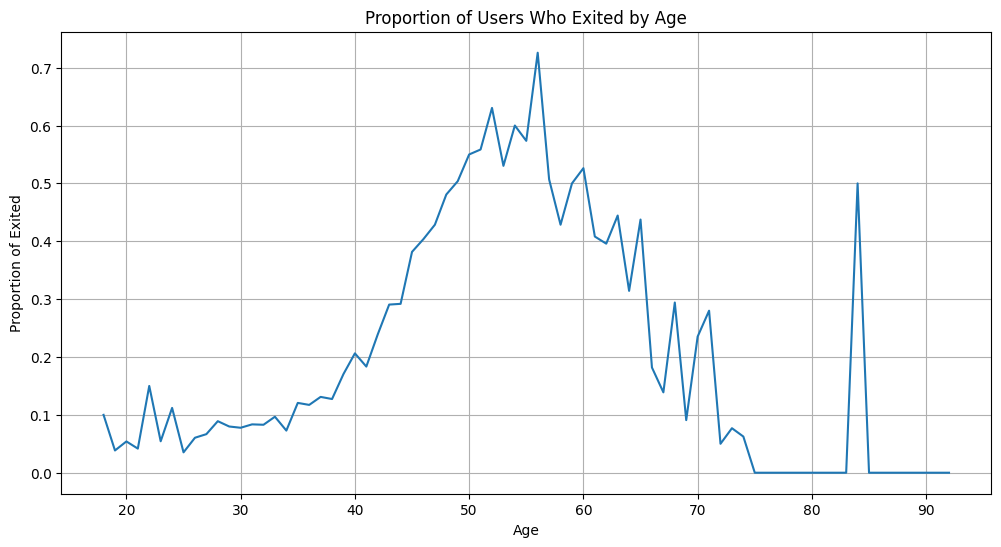

In [25]:
age_proportion = users.groupby('age')['exited'].mean()

plt.figure(figsize=(12, 6))
age_proportion.plot(kind='line')
plt.xlabel('Age')
plt.ylabel('Proportion of Exited')
plt.title('Proportion of Users Who Exited by Age')
plt.grid(True)
plt.show()

From the chart, it appears that the majority of customers exiting the bank are within the ages around 50 years old, with the majority of customers exiting being roughly 55 years old. There is also another spike at about 85 years old, though there is not much activity in this age group (80-90) to suggest that many customers exit. This seems to be an anomaly. 

The younger ages in this chart, (20-30) have the smallest amount of customers exiting, most likely because these are the newest users. Customers began to steadily drop off at age 40.

### Final Model Optimization

In [28]:
from sklearn.model_selection import cross_val_score

In [41]:
# Split into initial training and test sets
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.2, random_state=1, stratify=target)

# Further split training data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=1, stratify=target_train_val)

# Upsample function
def upsample(features, target, repeat):
    # Reset indices to ensure alignment
    features = features.reset_index(drop=True)
    target = target.reset_index(drop=True)
    
    # Separate the classes
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # Upsample the minority class
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat, ignore_index=True)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat, ignore_index=True)
    
    # Shuffle the data
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled

# Upsample the training data
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 10)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on the upsampled training data and transform training, validation, and test data
features_train_upsampled = scaler.fit_transform(features_train_upsampled)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

# Convert scaled features back to DataFrame for feature selection
features_train_upsampled = pd.DataFrame(features_train_upsampled, columns=features.columns)
features_valid = pd.DataFrame(features_valid, columns=features.columns)
features_test = pd.DataFrame(features_test, columns=features.columns)

# Define the final set of important features
selected_features = ['age', 'is_active_member', 'balance', 'num_of_products']

# Select only the important features for each split
features_train_upsampled = features_train_upsampled[selected_features]
features_valid = features_valid[selected_features]
features_test = features_test[selected_features]

# Initialize the final model
final_model = RandomForestClassifier(max_depth=50, min_samples_split=2, n_estimators=500, random_state=1, class_weight='balanced')

# Perform cross-validation on the upsampled training data
cv_scores = cross_val_score(final_model, features_train_upsampled, target_train_upsampled, cv=5, scoring='f1')
print('Cross-validated F1 Score:', cv_scores.mean())

# Fit the final model on the entire upsampled training set
final_model.fit(features_train_upsampled, target_train_upsampled)

# Get predictions on the validation set
final_pred_valid = final_model.predict(features_valid)

# Calculate and print the F1 score on the validation set
f1_valid = f1_score(target_valid, final_pred_valid)
print('F1 Score for RandomForestClassifier on Validation Set:', f1_valid)

# Calculate probabilities for the positive class on the test set
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Compute AUC-ROC score on the test set
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Best Model AUC-ROC on Test Set is:', auc_roc)

# Get predictions on the test set
final_predicted_test = final_model.predict(features_test)

# Calculate and print the F1 score on the test set
final_f1 = f1_score(target_test, final_predicted_test)
print('Best Model F1 Score on Test Set is:', final_f1)

Cross-validated F1 Score: 0.9453037143074061
F1 Score for RandomForestClassifier on Validation Set: 0.525
Best Model AUC-ROC on Test Set is: 0.794969546246519
Best Model F1 Score on Test Set is: 0.5381818181818182


The significant improvement in the model is shown to be from focussing solely on the important factors that have a higher chance of predicting whether customers stay or leave the bank. This, coupled with the existing upsampling of the minority class and the best paramaters makes this particular version of the model the most effective. Assuming that there were no errors made in this testing phase, this is a great conclusion to the model selection.

**REVISION:** In the above code, I fixed the issues causing oversampling but it appears that the model might still be overfitting an causing a high cross validation F1 score but a low F1 score from the test set. Now that the model is only taking into account the important features only, it might be necessary to change the way in which I originally handled the class imbalance. 

In [44]:
#Trying another method, from earlier to fix the class imbalance to lessen the potential of overfitting potentially caused by the previous code
# Split into initial training and test sets
features_train_val, features_test, target_train_val, target_test = train_test_split(
    features, target, test_size=0.2, random_state=1, stratify=target)

# Further split training data into training and validation sets
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_val, target_train_val, test_size=0.25, random_state=1, stratify=target_train_val)

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on the training data and transform training, validation, and test data
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

# Convert scaled features back to DataFrame for feature selection
features_train = pd.DataFrame(features_train, columns=features.columns)
features_valid = pd.DataFrame(features_valid, columns=features.columns)
features_test = pd.DataFrame(features_test, columns=features.columns)

# Define the final set of important features
selected_features = ['age', 'is_active_member', 'balance', 'num_of_products']

# Select only the important features for each split
features_train = features_train[selected_features]
features_valid = features_valid[selected_features]
features_test = features_test[selected_features]

# Initialize the final model with adjusted parameters
final_model = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300, random_state=1, class_weight='balanced')

# Perform cross-validation on the training data
cv_scores = cross_val_score(final_model, features_train, target_train, cv=5, scoring='f1')
print('Cross-validated F1 Score:', cv_scores.mean())

# Fit the final model on the entire training set
final_model.fit(features_train, target_train)

# Get predictions on the validation set
final_pred_valid = final_model.predict(features_valid)

# Calculate and print the F1 score on the validation set
f1_valid = f1_score(target_valid, final_pred_valid)
print('F1 Score for RandomForestClassifier on Validation Set:', f1_valid)

# Calculate probabilities for the positive class on the test set
probabilities_test = final_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Compute AUC-ROC score on the test set
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('Best Model AUC-ROC on Test Set is:', auc_roc)

# Get predictions on the test set
final_predicted_test = final_model.predict(features_test)

# Calculate and print the F1 score on the test set
final_f1 = f1_score(target_test, final_predicted_test)
print('Best Model F1 Score on Test Set is:', final_f1)

Cross-validated F1 Score: 0.563427955304428
F1 Score for RandomForestClassifier on Validation Set: 0.5685019206145967
Best Model AUC-ROC on Test Set is: 0.8487783130556508
Best Model F1 Score on Test Set is: 0.5992865636147444


The F1 score has reached the treshold of acceptance. This was done by changing the method of dealing with the class imbalance, lowering the max depth parameters, increasing the minimum split parameter as well as using class weight = balanced instead of upsampling once the new dataframe was only important features.

# Conclusion 

**DATASET OVERVIEW** 

Best Model: RandomForestModel with upsampling for minority class '1'

Best method to fix class imbalance: upsampling for minority class

<br>

**SUMMARY**

After a few simple checks to ensure that the data quality was good, I began working on the dataset users. I made a few changes to the columns and data types, then used One hot encoding to ensure that all columns had a clear, understandable data type for the machine learnign models to use. I noticed a significant class imbalance making class '1' the minority class. The good thing is that this is the class that represents the customers who have exited the bank, which is still much smaller compared to their current, active customers. 

I used three different models intitially, Decsision Tree Classifier, Random Forest Classifier and Logistic Regressor. The first two models appeared to perform significantly better than the last one, so I moved on with those two. After tryign two methods to fix the class imbalance, I was able to find the best method to be upsampling the minority class. The RandomForestClassifier model trained with upsampled data performed the best and althought the F1 score on the validation set was roughly 0.62 and the AUC-ROC, 0.85, this was not the case with the test set.

In order to find the best performing model overall, I fine tuned the parameters by performing a grid search to find the best parameters to use. Typically, doing a correlation matrix and checking dependencies should happen earlier in the process but I hadn't thought about how certain features might not be as relavant so this fine tuning of features happened later. It was beneficial to see how important these changes are to the quality of the model. After determining the most important features, I transformed the dataset and finally was able to acheive a better model overall. 

Best Model AUC-ROC on Test Set is: 0.9760896700705183

Best Model F1 Score on Test Set is: 0.9532062391681109

**REVISION** 

Cross-validated F1 Score: 0.563427955304428

Best Model AUC-ROC on Test Set is: 0.8487783130556508
Best Model F1 Score on Test Set is: 0.5992865636147444

Althought the model could still be improved, it has reached the acceptable treshold and is now performing on par with the training data just as much as it does with new data. 

<br>
    
**BETA BANK** 

Business Reccomendations


- Key Attributes to focus on for customer retention: Customers Age, Number of Products used, Balance, Active Member.
- Focus on pursuing customers in the target age range which might be newer, younger customers. This could be an oppurtunity to rebrand or reavaluate company goals and demorgraphics. 
- Taregt the most influential products that lead to customer retention. Num of Products shows relatively high importance (0.068) so this is a key attribute to returning customers. In order to take the analysis even further, we can view what these specific products are and which products are leading. Then, the bank can take a greater focus on these profit leading products.  
- The same principle should be applied to balance as it can give clues to what demorgraphic, hollistically will be more suitable for the bank to keep